In [ ]:
using Distributions, Turing
using Gadfly

In [ ]:
@model gdemo(x) = begin
  s ~ InverseGamma(2,3)
  m ~ Normal(0,sqrt(s))
  x[1] ~ Normal(m, sqrt(s))
  x[2] ~ Normal(m, sqrt(s))
  return s, m
end

In [ ]:
s = sample(gdemo([1.5, 2]), HMC(1000, 0.25, 5));

In [14]:
describe(s)

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

Empirical Posterior Estimates:
            Mean          SD       Naive SE       MCSE        ESS   
      m  1.161042370 0.814370027 0.0257526414 0.038326312  451.49141
     lp -5.758830558 1.195508991 0.0378053137 0.057821890  427.48524
elapsed  0.003535408 0.070500222 0.0022294128 0.002496646  797.38310
      s  2.071346985 2.336983156 0.0739018963 0.069109923 1000.00000

Quantiles:
             2.5%          25.0%        50.0%       75.0%         97.5%    
      m -0.5510164632  0.66698359561  1.1826675  1.6246656682  2.7634835035
     lp -8.6690549695 -6.22260366308 -5.3664453 -4.9203600096 -4.6490733021
elapsed  0.0007642758  0.00078240175  0.0008175  0.0009493025  0.0019374897
      s  0.5620218652  1.05162723391  1.5174882  2.4096450639  6.0285231525



In [ ]:
p = plot(s);

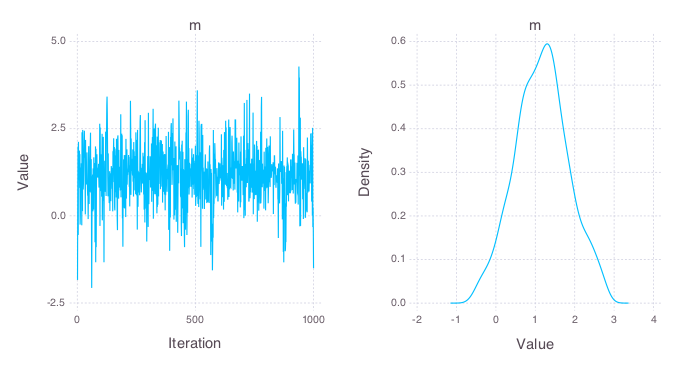

In [17]:
draw(PNG(18cm, 10cm), hstack(p[1:2]));

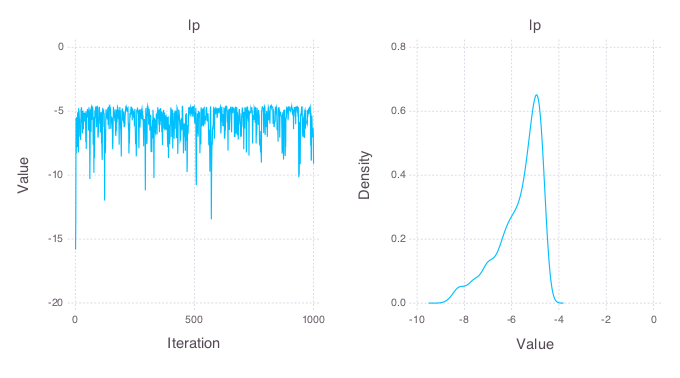

In [18]:
draw(PNG(18cm, 10cm), hstack(p[3:4]));

In [19]:
heideldiag(s)

        Burn-in Stationarity p-value     Mean      Halfwidth  Test
      m       0            1  0.7819  1.161042370 0.067447076    1
     lp       0            1  0.2645 -5.758830558 0.131752209    1
elapsed       0            1  0.3059  0.003535408 0.004854193    0
      s       0            1  0.3280  2.071346985 0.168651782    1

